In [2]:
# Cargamos las librerías
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import cv2

# Para visualizar el entrenamiento
import time
from IPython.display import clear_output

# **Red Neuronal 1.0**

## Definiciones de la red, funciones de creación y activación

Factor muy importantes a tener en cuenta a la hora de programar una red neuronal:

- **NEURONA**: Las neuronas son las unidades de procesamiento. Cuando juntamos muchas de estas neuronas en diferentes capas es cuando logramos contruir un sistema que llamamos Red Neuronal capaz de codificar y procesar información de forma compleja.

- **VECTORIZACIÓN**: Todas las fórmulas que utilizamos dentro de nuestras neuronas admiten una vectorización. Trabajar de este modo es obviamente muy efectivo pues nos permite, dentro de una misma capa, realizar las mismas operaciones para todas la neuronas. De este modo, podríamos ver realmente a una Red Neuronal como un conjunto de capas (o módulos) dentro de las cuales se encuentran una serie de neuronas realizando las mismas operaciones.

In [3]:
# CALSE DE LA CAPA DE LA RED

# Comenzamos creando el objeto: CAPA NEURONAL
class neural_layer():
    
    # Función de inicialización
    def __init__(self, n_conn, n_neur, act_f):
        
        # Función de activación
        self.act_f = act_f
        
        # Parámetro de bayas (tantos como neuronas)
        # Lo inicializamos con un valor aleatorio entre -1 y 1...
        self.b = np.random.rand(1, n_neur)     * 2 - 1
        
        # Parámetro red (matriz de conexiones conexiones·neuronas)
        # Lo inicializamos con un valor aleatorio entre -1 y 1...
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    
    # Función para actualizar manualmente los parámetros
    def boost(self, W, b):
      self.W = W
      self.b = b
    

In [4]:
# FUNCIÓN CREACIÓN

def create_nn(topology, act_f):
    
    nn = [] # Neural network
    
    for l, layer in enumerate(topology[:-1]):
        
        nn.append(neural_layer(topology[l], topology[l + 1], act_f))
    
    return nn

## Funciones para el entrenamiento de la red

Con todo esto, ya tenemos realmente construida nuestra primera red neuronal. Ahora lo que toca es aprender a entrenarla:

 1. La idea es comenzar dándole a la red unos datos de entrada y forzándola a procesarlos hacia delante. Así comenzará a ejecutar las funciones de activación teniendo en cuenta las masas ponderadas iniciales contenidas en la matriz W hasta escupir un valor final.
 
 2. Después tendríamos que comparar este valor final (probablemente bastante aleatorio) con el resultad real ayudándonos de la función de coste. Así vamos a generar un error que utilizaremos para hacer una propagación hacia atrás en la red (aplicando un algoritmo de back propagation) para así calcular las derivadas parciales:

        1. Cómputo del error de la última capa
         
$$\delta^L = \frac{\partial C}{\partial a^L}\frac{\partial a^L}{\partial z^L}$$
         
        2. Retropropagamos el error a la capa anterior
        
$$\delta^{l-1} = W^l \delta^l \cdot \frac{\partial a^{l-1}}{\partial z^{l-1}}$$

        3. Calculamos las derivadas de la capa usando el error
        
$$\frac{\partial C}{\partial b^{l-1}} = \delta^{l-1}  \qquad  \frac{\partial C}{\partial w^{l-1}} = \delta^{l-1} a^{l-2}$$

 3. Finalmente, una vez tenemos las derivadas parciales ejecutaremos el algoritmo del descenso del gradiente para comenzar a optimizar la función de coste y, por tanto, entrenar a nuestra red. Una vez finalizado este proceso, volveríamos al paso 1 hasta que el error obtenido inferior al deseado.

In [5]:
# FUNCIÓN DE ENTRENAMIENTO

# Función de error cuadrático medio y su derivada
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def forwardPass(neural_net, X):
    
    #out =[(z0, a0), (z1, a1), ...]
    out = [(None, X)]
    
    for l, layer in enumerate(neural_net):
    
                     # Multiplicación matricial
                     # v
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b # Señal
        a = neural_net[l].act_f[0](z)
        
        out.append((z,a))
    
    return out


def train(neural_net, X, Y, l2_cost, lr=0.001):
    # -----------------------------------------
    # neural_net: Red neuronal
    # X: Valores de entrada
    # Y: Valores de salida
    # l2_cost: Función de coste
    # lr: Learning rage ó ratio de aprendizaje
    # -----------------------------------------
  
    # Forward pass ----------------------------
    out = forwardPass(neural_net, X)
    
    # Backward pass ---------------------------
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
        
        z = out[l + 1][0]
        a = out[l + 1][1]
        
        # print(a.shape)
        
        
        if l == len(neural_net) - 1:
            # Calcular delta última capa.
            deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            
        else:
            # Calcular delta respecto a capa previa.
            deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
           
        _W = neural_net[l].W
        
        # Y al mismo tiempo...
        # Gradient descend ------------------------
                         
                                            # De la tercera ecuación...
                                            # Valor medio porque tenemos 500 deltas
        neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr                    
        neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr 
    
    return out[-1][1]
# --------------------------------------------------------------------------------------------      

In [6]:
# FUNCIÓN PARA VISUALIZAR LA RESPUESTA DE LA RED

def drawState(neural_net, input, save_name=""):
    _Y = forwardPass(neural_net, input)[-1][1]
    
    fig, ax1 = plt.subplots(1, 1)
    ax1.imshow(_Y.reshape((2*m+1,2*m+1)).T, cmap="gray")

    if save_name != "":
      plt.savefig(save_name)
    
    clear_output(wait=True)
    plt.show()

In [7]:
# FUNCIONES PARA GUARDAR Y CARGAR PARÁMETROS 
# (guardar estado de la red entrenada)

def save(neural_net, file):
  with open(file, 'wb') as f:
      for l in range(len(neural_n)):
        np.save(f, neural_n[l].W)
        np.save(f, neural_n[l].b)

def load(neural_net, file):  
  with open(file, 'rb') as f:
      for l in range(len(neural_n)):
        neural_net[l].boost(np.load(f), np.load(f))
        

# Probamos nuestra Red Neuronal

Una vez programada la red, es hora de empezar a probarla introduciendo nuestros datos y distintas funciones de activación.

## Cargamos los **datos procesados**

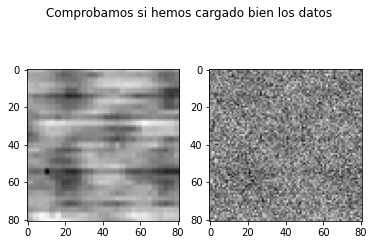

In [21]:
# Importamos los resultados de la factorización
clean_patchs = np.loadtxt(open("clean_patches/clean_stack.csv", "rb"), delimiter=",")
noisy_patchs = np.loadtxt(open("noisy_patches/noisy_stack.csv", "rb"), delimiter=",")

# - Comprobamos que la importación se ha realizado correctamente - #
# Anchura de los parches
m = 40
p = (2*m+1)**2

# X test
I1 = clean_patchs[0,:].reshape((2*m+1,2*m+1)).T
I2 = noisy_patchs[0,:].reshape((2*m+1,2*m+1)).T

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comprobamos si hemos cargado bien los datos')
ax1.imshow(I1, cmap="gray")
ax2.imshow(I2, cmap="gray")
plt.show()

X = noisy_patchs
Y = clean_patchs

In [ ]:
# Cargamos una imagen anómala
X_an = cv2.imread("clean_patches/anomaly.png")

X_an = X_an[:,:,1].reshape((2*m+1)**2)
X_an = X_an[np.newaxis, :]
print(np.shape(X_an))

In [22]:
# Seleccionamos un input para visualizar respuesta de la red
X_test = X[0,:]

## Definimos las **funciones de activación**

Expresamos las funciones de activación deseadas y su derivada en forma de array (nos basta con conocer la derivada porque vamos a aplicar un descenso del gradiente estocástico).

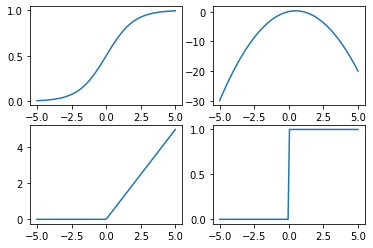

In [14]:
# FUNCIONES DE ACTIVACIÓN

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = (lambda x: np.maximum(0,x),
        lambda x: np.heaviside(x,0))

sino = (lambda x:  np.cos(x * 10),
        lambda x: -np.sin(x * 10) * 10)

identidad = (lambda x: x,
             lambda x: 1)

# Sigmoide: El valore de entrada se distorsiona
#           en un rango que va de 0 a 1.

# Vamos a visualizarlo:
_x = np.linspace(-5, 5, 100)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(_x,sigm[0](_x))
ax2.plot(_x,sigm[1](_x))
ax3.plot(_x,relu[0](_x))
ax4.plot(_x,relu[1](_x))

plt.show()

## Generación y entrenamiento de la **red**

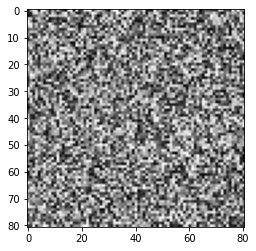

In [33]:
# Vamos a probar nuestra red neuronal
lifetime = 0
loss = []

# Introducimos la topología
topology= [p, 24, 12, 6, 14, 4, 12, 10, 8, 6, 10, 8, 25, 48, 12, 24, p]

# Generamos la red
neural_n = create_nn(topology, sigm)

# Visualizamos su estado inicial
drawState(neural_n, X_test)

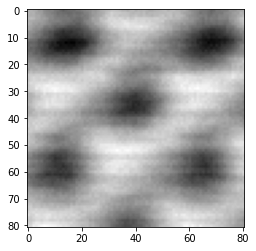

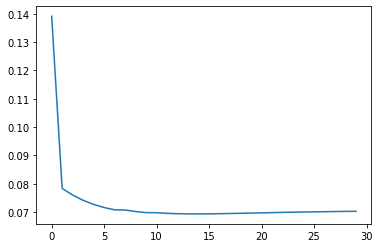

In [36]:
# Comenzamos a entrenar a la red!!
N = 200
loss_limit = 0.06

# Proceso de entrenamiento
for i in range(N):
    
    # Entrenamos a la red
    Yp = train(neural_n, X, Y, l2_cost, lr=0.2)
    lifetime += 1

    if i % 10 == 0: 
      loss.append(l2_cost[0](Yp, Y/2))
      plt.plot(range(len(loss)), loss)
      if loss[-1] < loss_limit:
          break

    if i % 10 == 0:
      drawState(neural_n, X_test)
      print("Ejecutando entrenamiento: ", i)

# Estado final
print("An m2 error of {} in lifetime = {} iterations.".format(loss[-1],lifetime) )
drawState(neural_n, X_test)
plt.plot(range(len(loss)), loss)
plt.show()

In [37]:
# Guardamos los parámetros de la red
save(neural_n, 'net_output/red_state.npy')

## Testeo de la **red**

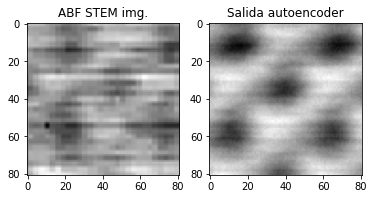

In [38]:
# Cargamos los parámetros de la red
load(neural_n, 'net_output/red_state.npy')

# Comparamos imagen original e imagen filtrada por autoencoder
_Y = forwardPass(neural_n, X[0,:])[-1][1]
    
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Y[0,:].reshape((2*m+1,2*m+1)).T, cmap="gray")
ax1.set_title("ABF STEM img.")
ax2.imshow(_Y.reshape((2*m+1,2*m+1)).T, cmap="gray")
ax2.set_title("Salida autoencoder")

# Guardamos el resultado
plt.savefig("net_output/denoised_output")